In [1]:
import streamlit as st
import pandas as pd
import pygwalker as pyg
import streamlit.components.v1 as components

In [2]:
st.set_page_config(
    page_title="Streamlit Tutorial: Basic Elements",
    page_icon="random",
    layout="wide",
    initial_sidebar_state="auto",
)

In [3]:
st.title("Streamlit Tutorial: Basic Elements")

st.header("Header")

st.write("Hello World!")

2023-08-17 08:19:31.935 
  command:

    streamlit run c:\Users\saran\anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
csv_data = st.file_uploader("Upload Raw data file for stripping", type="csv")

if csv_data is not None:
    stripping_df = pd.read_csv(csv_data, sep=";")

cols = stripping_df.select_dtypes(include=['float64']).columns
stripping_df[cols] = stripping_df[cols].round(2)

dataframe_tab, graph_tab = st.tabs(["Dataframe", "Graph"])

In [ ]:
with dataframe_tab:
    st.write(stripping_df)

In [ ]:
with graph_tab:
    # Generate the HTML using Pygwalker
    pyg_html = pyg.walk(stripping_df, return_html=True)
    components.html(pyg_html, height=1000, scrolling=True)


In [ ]:
database_upload_button = st.button(
    "Upload the data to Neo4j",
    key="upload_button",
    use_container_width=True,
    type="primary",
)

if database_upload_button:
    st.info("This is where the data would be uploaded to Neo4j")

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


In [2]:
# df = pd.read_csv(r'D:\MyDocs\DE\Projects\Project_Clustering\data\20230619_09_7512_0037_Drahtprüfung.csv', sep=";")

df = pd.DataFrame()
for file_name in glob.glob(r'D:\MyDocs\DE\Projects\Project_Clustering\data\Combined\*.csv'):
    x = pd.read_csv(file_name, sep=";", low_memory=False)
    df = pd.concat([df,x],axis=0)

In [33]:
df.shape

(25220, 31)

In [40]:
# kmeans = KMeans(n_clusters=5, random_state=0)

In [41]:
# kmeans.fit(df[["Differenz-Abisolierlänge", "Differenz-Abisolierposition", "Abisolierungs-Einzeldefektflaeche_max", "Abisolierungs-Gesamtdefektflaeche"]].fillna(0))

KMeans(n_clusters=5, random_state=0)

In [44]:
# df['label'] = kmeans.labels_

In [34]:
wcss = {} 
for i in range(2, 50): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 9)
    kmeans.fit(df[["Differenz_Abisolierlaenge_max", "Differenz_Abisolierposition", "Abisolierungs-Einzeldefektflaeche_max", "Abisolierungs-Gesamtdefektflaeche"]].fillna(0)) 
    wcss[i] = kmeans.inertia_

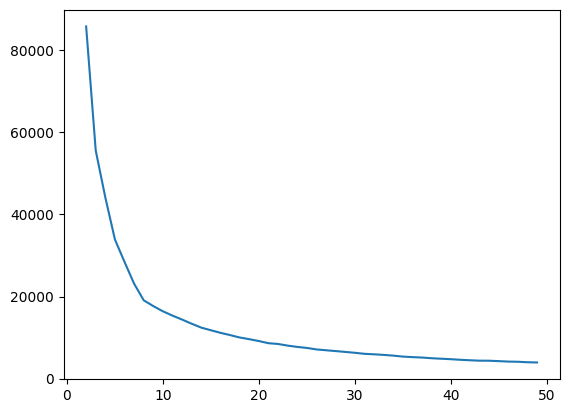

In [35]:
plt.plot(wcss.keys(), wcss.values())

In [3]:
wcss_med = {} 
for i in range(2, 50): 
    kmed = KMedoids(n_clusters=i, metric='cosine', random_state=9)
    kmed.fit(df[["Differenz_Abisolierlaenge_max", "Differenz_Abisolierposition", "Abisolierungs-Einzeldefektflaeche_max", "Abisolierungs-Gesamtdefektflaeche"]].fillna(0)) 
    wcss_med[i] = kmed.inertia_

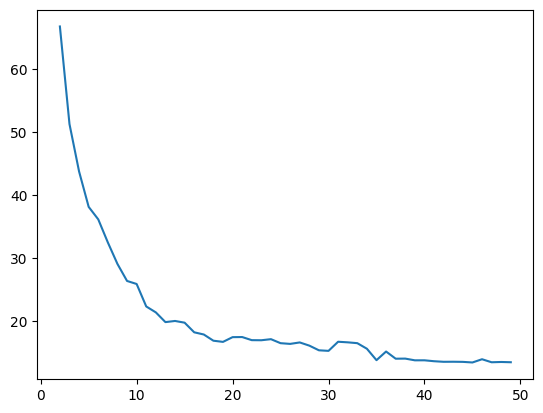

In [ ]:
plt.plot(wcss_med.keys(), wcss_med.values())

In [2]:
df1 = pd.read_csv(r'D:\MyDocs\DE\Projects\Project_Clustering\data\Combined\20220202_15_7512_0030_Drahtprüfung.csv', sep=";")
df2 = pd.read_csv(r'D:\MyDocs\DE\Projects\Project_Clustering\data\Combined\20230619_09_7512_0037_Drahtprüfung.csv', sep=";")
stripping_df = pd.concat([df1, df2], axis=0).reset_index(drop=True)
threshold_info = {}

In [42]:
stripping_df.iloc[0][['Arbeitsfolge', 'Min_Differenz_Abisolierposition', 'Max_Differenz_Abisolierposition']]

Arbeitsfolge                       AF0030
Min_Differenz_Abisolierposition      -1.7
Max_Differenz_Abisolierposition       0.7
Name: 0, dtype: object

In [43]:
stripping_df.columns

Index(['Kostenstelle', 'Arbeitsfolge', 'Bearbeitungsschritt', 'Datum', 'Zeit',
       'Ergebnis', 'Ausfuehrungszeit', 'Anzeigezeit', 'Pin_ID', 'Pin_Type',
       'Differenz_Abisolierposition', 'Min_Differenz_Abisolierposition',
       'Max_Differenz_Abisolierposition', 'Differenz_Abisolierlaenge_max',
       'Min_Differenz_Abisolierlaenge_max',
       'Max_Differenz_Abisolierlaenge_max', 'Differenz_Abisoliermitte_max',
       'Min_Differenz_Abisoliermitte_max', 'Max_Differenz_Abisoliermitte_max',
       'Isolations-Einzeldefektflaeche_max',
       'Min_Isolations-Einzeldefektflaeche_max',
       'Max_Isolations-Einzeldefektflaeche_max',
       'Isolations-Gesamtdefektflaeche', 'Min_Isolations-Gesamtdefektflaeche',
       'Max_Isolations-Gesamtdefektflaeche',
       'Abisolierungs-Einzeldefektflaeche_max',
       'Min_Abisolierungs-Einzeldefektflaeche_max',
       'Max_Abisolierungs-Einzeldefektflaeche_max',
       'Abisolierungs-Gesamtdefektflaeche',
       'Min_Abisolierungs-Gesamtdef

In [3]:
cols = [('Differenz_Abisolierposition', 'Min_Differenz_Abisolierposition', 'Max_Differenz_Abisolierposition'), 
        ('Differenz_Abisolierlaenge_max', 'Min_Differenz_Abisolierlaenge_max', 'Max_Differenz_Abisolierlaenge_max'),
        ('Abisolierungs-Einzeldefektflaeche_max', 'Min_Abisolierungs-Einzeldefektflaeche_max', 'Max_Abisolierungs-Einzeldefektflaeche_max'), 
        ('Abisolierungs-Gesamtdefektflaeche', 'Min_Abisolierungs-Gesamtdefektflaeche', 'Max_Abisolierungs-Gesamtdefektflaeche')]
for i, (a, b, c) in enumerate(cols):
        min_val = stripping_df.iloc[stripping_df.apply(lambda x: abs(x[b] - x[c]), axis=1).idxmin()][b]
        max_val = stripping_df.iloc[stripping_df.apply(lambda x: abs(x[b] - x[c]), axis=1).idxmin()][c]
        stripping_df[f"{b}_new"] = min_val
        stripping_df[f"{c}_new"] = max_val
        stripping_df[f"Target_{a}"] = 0.5 * (max_val + min_val) if i < 2 else 0
        stripping_df[f"{a}_norm"] = (stripping_df[a] - min_val) / (max_val - min_val)

In [14]:
stripping_df.iloc[:5,-20:]

,Max_Differenz_Abisolierposition_new,Target_Differenz_Abisolierposition,Differenz_Abisolierposition_norm,Min_Differenz_Abisolierlaenge_max_new,Max_Differenz_Abisolierlaenge_max_new,Target_Differenz_Abisolierlaenge_max,Differenz_Abisolierlaenge_max_norm,Min_Abisolierungs-Einzeldefektflaeche_max_new,Max_Abisolierungs-Einzeldefektflaeche_max_new,Target_Abisolierungs-Einzeldefektflaeche_max,Abisolierungs-Einzeldefektflaeche_max_norm,Min_Abisolierungs-Gesamtdefektflaeche_new,Max_Abisolierungs-Gesamtdefektflaeche_new,Target_Abisolierungs-Gesamtdefektflaeche,Abisolierungs-Gesamtdefektflaeche_norm
0,0.7,-0.5,0.438570,-0.5,2.0,0.75,0.452842,-0.1,3,0,0.032258,-0.1,5,0,0.019608
1,0.7,-0.5,0.211387,-0.5,2.0,0.75,0.501097,-0.1,3,0,0.044795,-0.1,5,0,0.027228
2,0.7,-0.5,0.391266,-0.5,2.0,0.75,0.452842,-0.1,3,0,0.032258,-0.1,5,0,0.019608
3,0.7,-0.5,0.393158,-0.5,2.0,0.75,0.452842,-0.1,3,0,0.032258,-0.1,5,0,0.019608
4,0.7,-0.5,0.417345,-0.5,2.0,0.75,0.404588,-0.1,3,0,0.032258,-0.1,5,0,0.019608


In [22]:
import plotly.graph_objects as go

categories = ['Differenz_Abisolierposition_norm', 'Differenz_Abisolierlaenge_max_norm','Abisolierungs-Einzeldefektflaeche_max_norm',
              'Abisolierungs-Gesamtdefektflaeche']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0, 0, 0, 0],
      theta=categories,
      fill='toself',
      name='Min Values'
))
fig.add_trace(go.Scatterpolar(
      r=[1, 1, 1, 1],
      theta=categories,
      fill=None,
      name='Max Values'
))
fig.add_trace(go.Scatterpolar(
      r=[0.5, 0.5, 0, 0],
      theta=categories,
      fill='toself',
      name='Target Values'
))
centers = np.random.rand(5,4).tolist()
for i, cent in enumerate(centers):
  fig.add_trace(go.Scatterpolar(
      r=cent,
      theta=categories,
      mode='lines+markers',
      name=f'Cluster_{i+1} Center'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [11]:
df

,r,theta
0,1,processing cost
1,5,mechanical properties
2,2,chemical stability
3,2,thermal stability
4,3,device integration


In [37]:
{k: v for k, v in sorted(dt.items(), key=lambda item: item[1])}

{2: 2, 3: 8, 0: 10, 1: 15}

In [38]:
labels = ['Critical', 'Very Bad', "Bad", "Good", "Very Good"]

In [57]:
pd.DataFrame({f"{l}_{k[0]}": k[1] for l, k in zip(labels, sorted(dt.items(), key=lambda item: item[1]))}, index=[0])

,Critical_2,Very Bad_3,Bad_0,Good_1
0,2,8,10,15


In [1]:
import pandas as pd

In [2]:
d = {0: {'f1': {'within': True, 'dft': 0.1, 'dfmin': 0.3, 'dfmax': 2}, 'f2': {'within': True, 'dft': 0.1, 'dfmin': 0.3, 'dfmax': 2}},
     1: {'f1': {'within': False, 'dft': 0.1, 'dfmin': 0.3, 'dfmax': 2}, 'f2': {'within': True, 'dft': 0.1, 'dfmin': 0.3, 'dfmax': 2}},
     2: {'f1': {'within': True, 'dft': 0.1, 'dfmin': 0.4, 'dfmax': 2}, 'f2': {'within': True, 'dft': 0.1, 'dfmin': 0.3, 'dfmax': 2}}}

In [12]:
pd.DataFrame.from_dict({(i,j): d[i][j] 
                           for i in d.keys() 
                           for j in d[i].keys()}).T.reset_index().rename(columns={'level_0': 'Cluster', 'level_1': 'Feature'})

,Cluster,Feature,within,dft,dfmin,dfmax
0,0,f1,True,0.1,0.3,2
1,0,f2,True,0.1,0.3,2
2,1,f1,False,0.1,0.3,2
3,1,f2,True,0.1,0.3,2
4,2,f1,True,0.1,0.4,2
5,2,f2,True,0.1,0.3,2


In [16]:
import plotly.express as px
import numpy as np
import pandas as pd
np.random.seed(1)

y0 = np.random.randn(5) - 1
y1 = np.random.randn(5) + 1

df = pd.DataFrame({'graph_name':['trace 0']*len(y0)+['trace 1']*len(y1),
                  'value': np.concatenate([y0,y1],0),
                   'color':np.random.choice([0,1,2,3,4,5,6,7,8,9], size=10, replace=True)}
                 )

fig = px.strip(df,
         x='graph_name',
         y='value',
         color='color',
         stripmode='overlay')

fig.update_layout(autosize=False,
                  width=600,
                  height=600,
                  legend={'traceorder':'normal'})

fig.show()

In [7]:
d1

{1: 2}